# Домашнее задание 02. Бостонская недвижимость.

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np
import seaborn as sns

%matplotlib inline

## Шаг 01. Загрузка данных.

In [2]:
# Загрузка данных по основному варианту
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

KeyError: 'filename'

In [55]:
# Данный подход не всегда работает, поэтому загружаем через другой подход: датасет без заголовков с прикреплением потом.
boston = load_boston() 
data_2 = pd.DataFrame(data= np.c_[boston['data'], boston['target']]) # Загружаем отдельно данные и таргет
data_2.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT','MEDV']
data_2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Шаг 02. Описываем датасет.

In [4]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(data)

In [13]:
profile.to_file(output_file="PandasProfiling.html")

In [15]:
# pandas_profiling.ProfileReport(data)

In [56]:
data_2.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [57]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [58]:
# Проверим кол-во нулевых значений по всем параметрам. Нулевые отсутствуют.
data_2.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

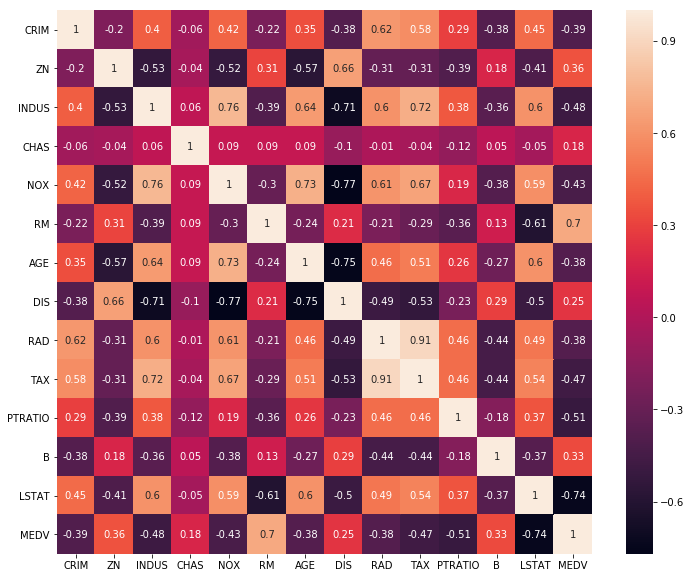

In [59]:
correlation_matrix = data_2.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

Данный датасет представляет собой описание объектов недвижимости в Бостоне:
- **CRIM**: Уровень преступности на душу населения.
- **ZN**: Доля крупных участков, площадью 25 000 кв. футов. 
- **INDUS**: Доля неторговых помещений
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). Скорее всего выход на реку.
- **NOX**: Концентрация оксидов азота NOX (parts per 10 million)        
- **RM**: Среднее кол-во комнат (average number of rooms per dwelling)
- **AGE**: Доля заселенных домов, построенных до 1940
- **DIS**: Взвешенные расстояния до пяти бостонских центров занятости    
- **RAD**: Индекс доступности к радиальным магистралям
- **TAX**: Размер налогов на имущество (full-value property-tax rate per 10 000)
- **PTRATIO**: Соотношение учеников и учителей по городам
- **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town. Похоже, доля чернокожих.
- **LSTAT**: Возможно доля необеспеченного населения (% lower status of the population)
- **MEDV**: Медианная стоимость заселенных домов в тыс. долларов. Это наш таргет.

Сформулируем первичные предположения:
* Пропуски и нулевые значения отсутствуют  
* Все показатели - числовые, за исключением CHAS

Положительное влияние оказывают CHAS, RM, RAD, PTRATIO  
Негативное влияние: CRIM, NOX, AGE, DIS, TAX, LSTAT  

Есть подозрение, что показатель DIS - категориальный признак. Требуется проверить.



1. Сильная обратная корреляция **LSTAT** к целевой метрике  
2. Сильная положительная корреляция **RM** к целевой метрике 
3. Сильная положительная корреляция **RAD - TAX**
4. Сильная корреляция **DIS** и **INDUS/NOX/AGE** *(не ниже -0,7)*

## Шаг 04. 01. Попробуем обработать данные в лоб.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [61]:
X_2 = data_2[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y_2 = data_2['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3, random_state=1)
estimator = LinearRegression()
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)

print(f'Коэффициент детерминации (R2): {r2_score(y_test, y_pred)}')
print(f'Среднеквадратичная ошибка (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Среднее абсолютной ошибки (MAE): {mean_absolute_error(y_test, y_pred)}')

Коэффициент детерминации (R2): 0.7836482437943226
Среднеквадратичная ошибка (RMSE): 4.453044941228997
Среднее абсолютной ошибки (MAE): 3.343559993899493


In [62]:
y_train[:20]

13     20.4
61     16.0
377    13.3
39     30.8
365    27.5
272    24.4
208    24.4
236    25.1
98     43.8
364    21.9
249    26.2
421    14.2
422    20.8
286    20.1
347    23.1
378    13.1
127    16.2
82     24.8
463    20.2
207    22.5
Name: MEDV, dtype: float64

In [63]:
data_2.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Результат 01.
Выглядит в целом нормально, но есть сомнения: ошибка в 3,4 при средней 22 большая.

In [66]:
X_2.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [67]:
estimator.coef_

array([-9.71284334e-02,  6.07284394e-02,  5.96370092e-02,  2.44352809e+00,
       -2.14995617e+01,  2.78993012e+00,  3.66229013e-03, -1.51568850e+00,
        3.06819943e-01, -1.12697744e-02, -1.00652372e+00,  6.56942407e-03,
       -5.69755469e-01])

In [68]:
estimator.intercept_

46.420095435330296

## Шаг 05. Вернемся к описанию и отбору признаков.

In [18]:
data_2.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
data_2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Разберем переменную CHAS.

In [24]:
data_2['CHAS'].unique()

array([0., 1.])

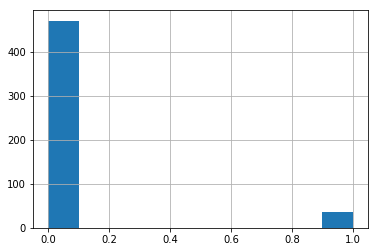

In [25]:
data_2['CHAS'].hist()

Точно категориальная переменная, но оставим, т.к. она соответствует 1-0

Точно категориальная переменная, но оставим, т.к. она соответствует 1-0

### Разберем переменную RAD.
Переменная определяется, как  *"Индекс доступности к радиальным магистралям"* и описывается следующими образом: 


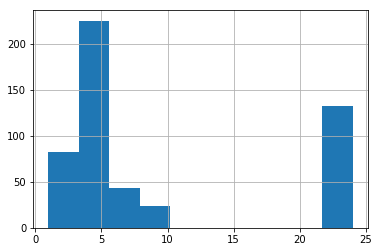

In [20]:
data_2['RAD'].hist()

In [22]:
data_2['RAD'].unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

Получается, что показатель включает только значения 1-8 и 24. Предполагаю, что это все-таки категориальный признак.

In [27]:
# Рассмотрим, как отличатся данные параметры от категории
data_rad24 = data_2[data_2['RAD'] == 24]

In [28]:
data_rad24.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,132.000000,132.0,1.320000e+02,132.000000,132.000000,132.000000,132.000000,132.000000,132.0,132.0,1.320000e+02,132.000000,132.000000,132.000000
mean,12.683533,0.0,1.810000e+01,0.060606,0.672417,6.022152,89.805303,2.061254,24.0,666.0,2.020000e+01,288.089167,18.600606,16.403788
std,13.082369,0.0,4.636122e-14,0.239515,0.061004,0.718449,12.625809,0.617901,0.0,0.0,1.426499e-14,145.860431,6.905296,8.539745
min,0.671800,0.0,1.810000e+01,0.000000,0.532000,3.561000,40.300000,1.129600,24.0,666.0,2.020000e+01,0.320000,2.960000,5.000000
25%,5.669078,0.0,1.810000e+01,0.000000,0.614000,5.713000,85.925000,1.589250,24.0,666.0,2.020000e+01,167.375000,14.175000,11.225000
50%,8.887540,0.0,1.810000e+01,0.000000,0.693000,6.176000,94.400000,1.943400,24.0,666.0,2.020000e+01,373.740000,17.910000,14.400000
75%,14.333700,0.0,1.810000e+01,0.000000,0.713000,6.419000,98.825000,2.431300,24.0,666.0,2.020000e+01,395.292500,23.045000,19.900000
max,88.976200,0.0,1.810000e+01,1.000000,0.770000,8.780000,100.000000,4.098300,24.0,666.0,2.020000e+01,396.900000,37.970000,50.000000


In [29]:
data_2.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Изначально предполагал, что относится к 1 конкретному району. Выяснилось, что это не так.

## Шаг 04. 02. Попробуем обработать данные по основным параметрам

In [33]:
# Сильная обратная корреляция LSTAT к целевой метрике
# Сильная положительная корреляция RM к целевой метрике
# Сильная положительная корреляция RAD - TAX
# Сильная корреляция DIS и INDUS/NOX/AGE (не ниже -0,7)

In [34]:
data_new = data_2[['RM','RAD', 'LSTAT', 'MEDV' ]]
data_new.head()

,RM,RAD,LSTAT,MEDV
0,6.575,1.0,4.98,24.0
1,6.421,2.0,9.14,21.6
2,7.185,2.0,4.03,34.7
3,6.998,3.0,2.94,33.4
4,7.147,3.0,5.33,36.2


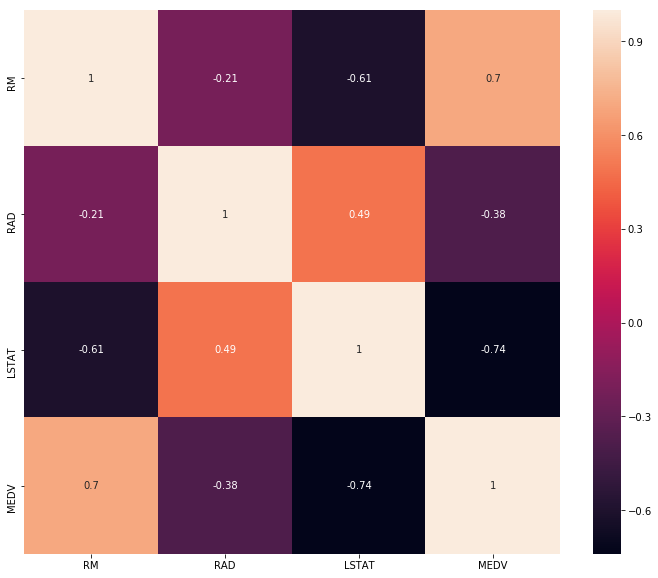

In [35]:
# Взаимосвязи в датасете:
correlation_matrix = data_new.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

In [36]:
data_new.columns

Index(['RM', 'RAD', 'LSTAT', 'MEDV'], dtype='object')

In [39]:
# Суть упражнения: у нас есть X - параметры и значения, y - имеющиеся значения результата. На них модель учится.
X_columns = data_new.columns[:3] # Столбцы с 1 до предпоследнего 
y_columns = data_new.columns[-1] # Последний столбец

X_columns, y_columns

(Index(['RM', 'RAD', 'LSTAT'], dtype='object'), 'MEDV')

In [40]:
X = data_new[X_columns]
y = data_new[y_columns]

In [42]:
X[:20]

,RM,RAD,LSTAT
0,6.575,1.0,4.98
1,6.421,2.0,9.14
2,7.185,2.0,4.03
3,6.998,3.0,2.94
4,7.147,3.0,5.33
5,6.430,3.0,5.21
6,6.012,5.0,12.43
7,6.172,5.0,19.15
8,5.631,5.0,29.93
9,6.004,5.0,17.10


In [43]:
y[:20]

0     24.0
1     21.6
2     34.7
3     33.4
4     36.2
5     28.7
6     22.9
7     27.1
8     16.5
9     18.9
10    15.0
11    18.9
12    21.7
13    20.4
14    18.2
15    19.9
16    23.1
17    17.5
18    20.2
19    18.2
Name: MEDV, dtype: float64

In [44]:
# Разделяем выборку на 2 части. Обучаемая и тестовая.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [45]:
# Запускаем обучение модели. Модель будет называться estimator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

estimator = LinearRegression()
# Обучение
estimator.fit(X_train, y_train)

# Предсказание
y_pred = estimator.predict(X_test)
print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: \t", mean_absolute_error(y_test, y_pred))

R2: 	 0.6215133302412722
RMSE: 	 4.907023493109832
MAE: 	 3.582118557629308


Ошибка получается схожая, но R2 ниже.

In [47]:
X_columns

Index(['RM', 'RAD', 'LSTAT'], dtype='object')

In [48]:
estimator.coef_

array([ 5.2374487, -0.0745428, -0.6226756])

In [49]:
estimator.intercept_

-1.8633294457960297

По модели получается, что она адекватно описывает модель. Получается, что чем больше комнат, чем дальше от магистрали и лучше живут люди, тем дороже жилье. Данная модель мне видится более адекватной.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, Y_train, Y_test = train_test_split(data_2[['LSTAT', 'RM']], data_2['MEDV'], test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

model = LinearRegression()
model.fit(X_train, Y_train)

X_2 = data_2[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y_2 = data_2['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3, random_state=1)
estimator = LinearRegression()
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)

print(f'Коэффициент детерминации (R2): {r2_score(y_test, y_pred)}')
print(f'Среднеквадратичная ошибка (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Среднее абсолютной ошибки (MAE): {mean_absolute_error(y_test, y_pred)}')

(404, 2)
(102, 2)
(404,)
(102,)
Коэффициент детерминации (R2): 0.7836482437943226
Среднеквадратичная ошибка (RMSE): 4.453044941228997
Среднее абсолютной ошибки (MAE): 3.343559993899493


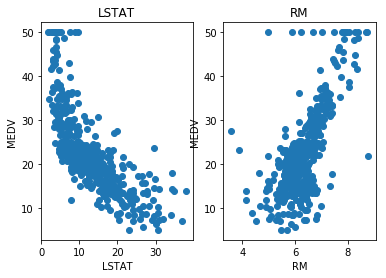

In [14]:
features = ['LSTAT', 'RM']
target = data_2['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data_2[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Отбрасывать слишком много. Можно выделить в отдельный район, но в рамках данной работы не будем.

In [ ]:
Можно

In [24]:
data_2['RAD'].unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])